<a href="https://colab.research.google.com/github/ellieyakim0829/dataAnalysis/blob/main/2_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_OpenAPI_%EC%8B%A4%EC%8A%B5_20240429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 5. OpenAPI를 이용한 데이터 수집

- <a href="#1)OpenAPI통한데이터수집">1) OpenAPI 통한 데이터 수집</a>
- <a href="#2)한글텍스트Cleansing">2) 한글 텍스트 Cleansing</a>
- <a href="#3)웹이미지수집하기">3) 웹 이미지 수집하기</a>

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

- **한글 폰트 지정하기**

In [ ]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

---

### <a name="1)OpenAPI통한데이터수집">1) OpenAPI 통한 데이터 수집</a>

#### 1.도서관 정보나루  OpenAPI 신청하기
*  (책, 뉴스, 쇼핑)
    - 오픈 API 활용 방법: https://www.data4library.kr/apiUtilization
    - OpenAPI 신청하기: https://www.data4library.kr/myPage?isValid=true

#### 2.네이버 OpenAPI 사용하기
* 검색
    - 1.책 검색
    - 2.뉴스 검색
    - 3.쇼핑 검색

#### [실습] : 네이버 검색 API 사용하여 데이터 수집하기

In [ ]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

# 도서관 정보나루 api 활용하기


In [ ]:
import requests
import xml.etree.ElementTree as ET

# URL 설정
url = "http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2022-01-01&endDt=2022-03-31&gender=1&age=20&region=11;31&addCode=0&kdc=6&pageNo=1&pageSize=10"

# GET 요청을 보내고 응답을 받습니다.
r = requests.get(url)

# 응답의 인코딩을 UTF-8로 설정합니다.
r.encoding = 'UTF-8'

# 응답을 XML 형식으로 파싱합니다.
tree = ET.fromstring(r.text)
print(tree)

<Element 'response' at 0x7e221808ea70>


In [18]:
import requests
import xml.etree.ElementTree as ET

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2022-01-01&endDt=2022-03-31&gender=1&age=20&region=11;31&addCode=0&kdc=6&pageNo=1&pageSize=10'

# URL에서 XML 데이터를 가져옵니다.
response = requests.get(url)

# 응답의 텍스트를 XML 문자열로 변환합니다.
xml_data = response.text

# XML 문자열을 파싱합니다.
root = ET.fromstring(xml_data)

# 각 도서 정보에 접근하여 출력합니다.
for doc in root.findall('docs/doc'):
    bookname = doc.find('bookname').text
    ranking = doc.find('ranking').text
    authors = doc.find('authors').text
    publisher = doc.find('publisher').text
    publication_year = doc.find('publication_year').text
    isbn13 = doc.find('isbn13').text
    loan_count = doc.find('loan_count').text
    print("도서명:", bookname)
    print("순위",ranking)
    print("저자:", authors)
    print("출판사:", publisher)
    print("출판년도:", publication_year)
    print("ISBN:", isbn13)
    print("대출 횟수:", loan_count)
    print("-----")


도서명: 방구석 미술관 :가볍고 편하게 시작하는 유쾌한 교양 미술
순위 1
저자: 조원재 지음
출판사: 백도씨
출판년도: 2018
ISBN: 9788968331862
대출 횟수: 213
-----
도서명: 방구석 미술관
순위 2
저자: 조원재 지음
출판사: 백도씨
출판년도: 2020
ISBN: 9788968332845
대출 횟수: 152
-----
도서명: 모국어는 차라리 침묵 :목정원 산문
순위 3
저자: 지은이: 목정원
출판사: 아침달
출판년도: 2021
ISBN: 9791189467302
대출 횟수: 120
-----
도서명: 우아하고 호쾌한 여자 축구 :김혼비 에세이
순위 4
저자: 지은이: 김혼비
출판사: 민음사
출판년도: 2018
ISBN: 9788937437571
대출 횟수: 108
-----
도서명: 내가 사랑한 화가들 :살면서 한 번은 꼭 들어야 할 아주 특별한 미술 수업
순위 5
저자: 정우철 지음
출판사: 나무의철학
출판년도: 2021
ISBN: 9791158512132
대출 횟수: 100
-----
도서명: 기묘한 미술관 :아름답고 서늘한 명화 속 미스터리
순위 6
저자: 진병관 지음
출판사: 빅피시
출판년도: 2021
ISBN: 9791191825084
대출 횟수: 87
-----
도서명: 김이나의 작사법 :우리의 감정을 사로잡는 일상의 언어들
순위 7
저자: 지은이: 김이나
출판사: 문학동네
출판년도: 2015
ISBN: 9788954635608
대출 횟수: 86
-----
도서명: 지브리의 천재들 :전 세계 1억 명의 마니아를 탄생시킨 스튜디오 지브리의 성공 비결
순위 8
저자: 스즈키 도시오 지음 ;이선희 옮김
출판사: 포레스트북스
출판년도: 2020
ISBN: 9791189584887
대출 횟수: 75
-----
도서명: 겁내지 않고 그림 그리는 법
순위 9
저자: 저자: 이연
출판사: 미술문화
출판년도: 2021
ISBN: 9791185954707
대출 횟수: 74
-----
도서명: 널 위한 문화예술 :미술관에서 길을 잃는 사

In [19]:
!pip install xmltodict

#  데이터4도서관 API를 사용하여 도서 대출 정보를 가져와서 XML 형식으로 변환한 다음, 이를 JSON 형식으로 바꾸어 데이터 추출



In [29]:
import requests
import xmltodict
import json
import os
import sys
import urllib.request
import datetime
import time
import pandas as pd

url = 'http://data4library.kr/api/loanItemSrch?authKey=b8604a40cf9f0ce1e10c1d20ac9c70e6b6ddf0a5b7b751370b67131552680c20&startDt=2022-01-01&endDt=2022-03-31&gender=1&age=20&region=11;31&addCode=0&kdc=6&pageNo=1&pageSize=10'

# URL에서 XML 데이터를 가져옵니다.
response = requests.get(url)

# XML 데이터를 파싱하여 OrderedDict로 변환합니다.
xml_data = xmltodict.parse(response.text)


# # OrderedDict를 JSON 문자열로 변환합니다.
# json_data = json.dumps(xml_data, indent=4)  Unicode 문자열이 JSON으로 변환될 때 인코딩 문제가 발생함
#문제를 해결하려면 ensure_ascii=False 옵션을 사용하여 JSON으로 변환할 때 ASCII 이외의 문자를 모두 이스케이프하지 않도록 설정

# OrderedDict를 JSON 문자열로 변환합니다. ensure_ascii=False 옵션을 사용하여 Unicode 문자열을 이스케이프하지 않습니다.
json_data = json.dumps(xml_data, ensure_ascii=False, indent=4)

# JSON 데이터를 출력합니다.
print(json_data)


# json_data를 파이썬 객체로 변환합니다.
data = json.loads(json_data)

# 도서 정보를 저장할 리스트를 초기화합니다.
books = []

# 도서 정보를 리스트에 추가합니다.
for d in data['response']['docs']['doc']:
    books.append(d)

# 결과를 출력합니다.
print(books)

{
    "response": {
        "request": {
            "startDt": "2022-01-01",
            "endDt": "2022-03-31",
            "gender": "1",
            "age": "20",
            "addCode": "0",
            "kdc": "6",
            "region": "11;31",
            "pageNo": "1",
            "pageSize": "10"
        },
        "resultNum": "10",
        "numFound": "5000",
        "docs": {
            "doc": [
                {
                    "no": "1",
                    "ranking": "1",
                    "bookname": "방구석 미술관 :가볍고 편하게 시작하는 유쾌한 교양 미술",
                    "authors": "조원재 지음",
                    "publisher": "백도씨",
                    "publication_year": "2018",
                    "isbn13": "9788968331862",
                    "addition_symbol": "03600",
                    "vol": null,
                    "class_no": "650.4",
                    "class_nm": "예술 > 회화, 도화 > 회화, 도화",
                    "loan_count": "213",
                    "bookImageURL": "https:/

In [30]:
books_df = pd.DataFrame(books)
books_df.head(2)

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,방구석 미술관 :가볍고 편하게 시작하는 유쾌한 교양 미술,조원재 지음,백도씨,2018,9788968331862,03600,None,650.4,"예술 > 회화, 도화 > 회화, 도화",213,https://bookthumb-phinf.pstatic.net/cover/138/...,https://data4library.kr/bookV?seq=3858776
1,2,2,방구석 미술관,조원재 지음,백도씨,2020,9788968332845,03600,2,650.4,"예술 > 회화, 도화 > 회화, 도화",152,https://image.aladin.co.kr/product/25566/91/co...,https://data4library.kr/bookV?seq=5799196


In [23]:
books_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no                10 non-null     object
 1   ranking           10 non-null     object
 2   bookname          10 non-null     object
 3   authors           10 non-null     object
 4   publisher         10 non-null     object
 5   publication_year  10 non-null     object
 6   isbn13            10 non-null     object
 7   addition_symbol   10 non-null     object
 8   vol               1 non-null      object
 9   class_no          10 non-null     object
 10  class_nm          10 non-null     object
 11  loan_count        10 non-null     object
 12  bookImageURL      10 non-null     object
 13  bookDtlUrl        10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


In [25]:
# 생성된 프레임에서 특정열만 선택해서 새로은 데이터 프레임만들기
books = books_df[['no','ranking','bookname','authors','publisher','publication_year','isbn13','class_nm','loan_count','bookImageURL','bookDtlUrl']]
books

,no,ranking,bookname,authors,publisher,publication_year,isbn13,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,방구석 미술관 :가볍고 편하게 시작하는 유쾌한 교양 미술,조원재 지음,백도씨,2018,9788968331862,"예술 > 회화, 도화 > 회화, 도화",213,https://bookthumb-phinf.pstatic.net/cover/138/...,https://data4library.kr/bookV?seq=3858776
1,2,2,방구석 미술관,조원재 지음,백도씨,2020,9788968332845,"예술 > 회화, 도화 > 회화, 도화",152,https://image.aladin.co.kr/product/25566/91/co...,https://data4library.kr/bookV?seq=5799196
2,3,3,모국어는 차라리 침묵 :목정원 산문,지은이: 목정원,아침달,2021,9791189467302,예술 > 예술 > 예술,120,https://image.aladin.co.kr/product/28091/4/cov...,https://data4library.kr/bookV?seq=6315295
3,4,4,우아하고 호쾌한 여자 축구 :김혼비 에세이,지은이: 김혼비,민음사,2018,9788937437571,"예술 > 오락, 운동 > 구기",108,http://image.aladin.co.kr/product/14970/22/cov...,https://data4library.kr/bookV?seq=3766967
4,5,5,내가 사랑한 화가들 :살면서 한 번은 꼭 들어야 할 아주 특별한 미술 수업,정우철 지음,나무의철학,2021,9791158512132,"예술 > 회화, 도화 > 회화, 도화",100,https://bookthumb-phinf.pstatic.net/cover/189/...,https://data4library.kr/bookV?seq=5962096
5,6,6,기묘한 미술관 :아름답고 서늘한 명화 속 미스터리,진병관 지음,빅피시,2021,9791191825084,"예술 > 회화, 도화 > 회화, 도화",87,https://image.aladin.co.kr/product/27920/22/co...,https://data4library.kr/bookV?seq=6091133
6,7,7,김이나의 작사법 :우리의 감정을 사로잡는 일상의 언어들,지은이: 김이나,문학동네,2015,9788954635608,예술 > 음악 > 성악,86,http://image.aladin.co.kr/product/5482/88/cove...,https://data4library.kr/bookV?seq=2619164
7,8,8,지브리의 천재들 :전 세계 1억 명의 마니아를 탄생시킨 스튜디오 지브리의 성공 비결,스즈키 도시오 지음 ;이선희 옮김,포레스트북스,2020,9791189584887,예술 > 연극 > 영화,75,https://image.aladin.co.kr/product/26651/39/co...,https://data4library.kr/bookV?seq=5938566
8,9,9,겁내지 않고 그림 그리는 법,저자: 이연,미술문화,2021,9791185954707,"예술 > 회화, 도화 > 회화, 도화",74,https://image.aladin.co.kr/product/26722/32/co...,https://data4library.kr/bookV?seq=5945219
9,10,10,널 위한 문화예술 :미술관에서 길을 잃는 사람들을 위한 가장 친절한 예술 가이드,"오대우,이정우 지음",Whale Books(웨일북),2021,9791190313926,"예술 > 회화, 도화 > 회화, 도화",72,https://image.aladin.co.kr/product/27473/16/co...,https://data4library.kr/bookV?seq=6041902


In [ ]:
# 컬럼명 변경하기
# 컬럼명 변경하려면 원본 데이터프레임의 열의 수는 14개인데 새로운 컬럼명 리스트의 요소 개수는 11개로 일치하지 않아 먼저 불필요한 컬럼은 삭제하고
#컬럼명을 변경해야 한다.

# 필요없는 열을 제거하여 새로운 데이터프레임 생성
books_df = books_df.drop(['addition_symbol', 'vol', 'class_no'], axis=1)

# 새로운 컬럼명 리스트를 사용하여 컬럼명 변경
books_df.columns = ['순번', '순위', '도서명', '저자명', '출판사', '출판년도', '13자리 ISBN', '주제분류명', '대출건수', '책표지URL', '도서상세페이지 URL']

# 결과 확인
books_df

In [33]:
books_df

,순번,순위,도서명,저자명,출판사,출판년도,13자리 ISBN,주제분류명,대출건수,책표지URL,도서상세페이지 URL
0,1,1,방구석 미술관 :가볍고 편하게 시작하는 유쾌한 교양 미술,조원재 지음,백도씨,2018,9788968331862,"예술 > 회화, 도화 > 회화, 도화",213,https://bookthumb-phinf.pstatic.net/cover/138/...,https://data4library.kr/bookV?seq=3858776
1,2,2,방구석 미술관,조원재 지음,백도씨,2020,9788968332845,"예술 > 회화, 도화 > 회화, 도화",152,https://image.aladin.co.kr/product/25566/91/co...,https://data4library.kr/bookV?seq=5799196
2,3,3,모국어는 차라리 침묵 :목정원 산문,지은이: 목정원,아침달,2021,9791189467302,예술 > 예술 > 예술,120,https://image.aladin.co.kr/product/28091/4/cov...,https://data4library.kr/bookV?seq=6315295
3,4,4,우아하고 호쾌한 여자 축구 :김혼비 에세이,지은이: 김혼비,민음사,2018,9788937437571,"예술 > 오락, 운동 > 구기",108,http://image.aladin.co.kr/product/14970/22/cov...,https://data4library.kr/bookV?seq=3766967
4,5,5,내가 사랑한 화가들 :살면서 한 번은 꼭 들어야 할 아주 특별한 미술 수업,정우철 지음,나무의철학,2021,9791158512132,"예술 > 회화, 도화 > 회화, 도화",100,https://bookthumb-phinf.pstatic.net/cover/189/...,https://data4library.kr/bookV?seq=5962096
5,6,6,기묘한 미술관 :아름답고 서늘한 명화 속 미스터리,진병관 지음,빅피시,2021,9791191825084,"예술 > 회화, 도화 > 회화, 도화",87,https://image.aladin.co.kr/product/27920/22/co...,https://data4library.kr/bookV?seq=6091133
6,7,7,김이나의 작사법 :우리의 감정을 사로잡는 일상의 언어들,지은이: 김이나,문학동네,2015,9788954635608,예술 > 음악 > 성악,86,http://image.aladin.co.kr/product/5482/88/cove...,https://data4library.kr/bookV?seq=2619164
7,8,8,지브리의 천재들 :전 세계 1억 명의 마니아를 탄생시킨 스튜디오 지브리의 성공 비결,스즈키 도시오 지음 ;이선희 옮김,포레스트북스,2020,9791189584887,예술 > 연극 > 영화,75,https://image.aladin.co.kr/product/26651/39/co...,https://data4library.kr/bookV?seq=5938566
8,9,9,겁내지 않고 그림 그리는 법,저자: 이연,미술문화,2021,9791185954707,"예술 > 회화, 도화 > 회화, 도화",74,https://image.aladin.co.kr/product/26722/32/co...,https://data4library.kr/bookV?seq=5945219
9,10,10,널 위한 문화예술 :미술관에서 길을 잃는 사람들을 위한 가장 친절한 예술 가이드,"오대우,이정우 지음",Whale Books(웨일북),2021,9791190313926,"예술 > 회화, 도화 > 회화, 도화",72,https://image.aladin.co.kr/product/27473/16/co...,https://data4library.kr/bookV?seq=6041902


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

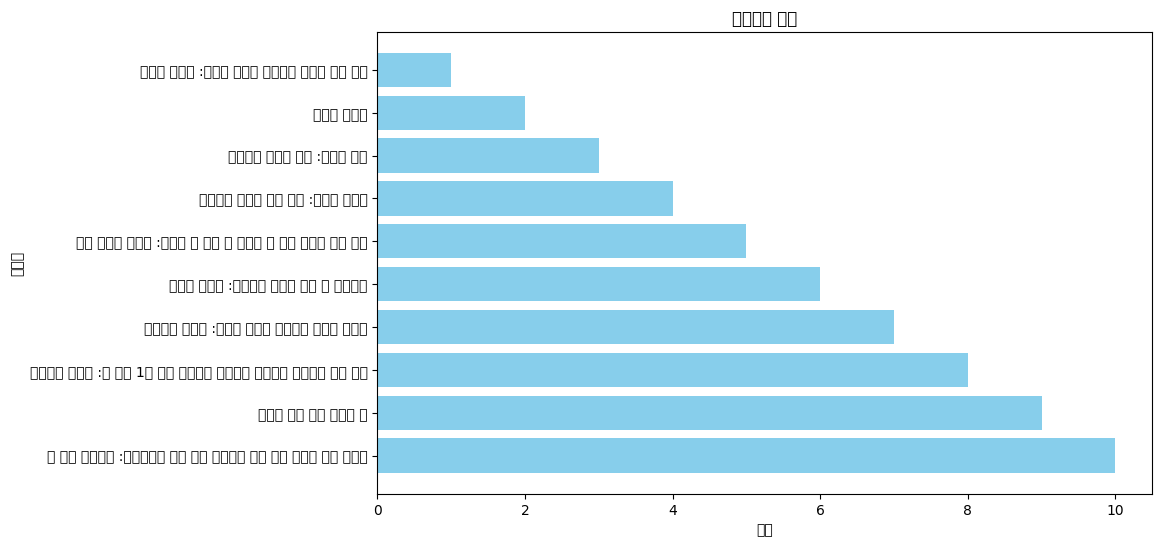

In [34]:
import matplotlib.pyplot as plt

# 인기도서 순위 데이터 가져오기
rankings = books_df['순위'].astype(int)
books_names = books_df['도서명']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(books_names, rankings, color='skyblue')
plt.xlabel('순위')
plt.ylabel('도서명')
plt.title('인기도서 순위')
plt.gca().invert_yaxis()  # y 축 역순으로 변경하여 1위가 위로 오도록 설정
plt.show()

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = ''          # 자신의 client_id
client_pw = ''          # 자신의 client_secret
PATH = './data'         # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, keyword, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(keyword), start, display)

    url = base + node + parameters
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, keyword

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.[1:책, 2:뉴스, 3:쇼핑]')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'
    else:
        node == '1'
        node = 'book'

    keyword = input(f'{node} 검색할 검색어를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, keyword, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, keyword, start, total)
#     print(f'가져올 데이터 : {total} 건')

    # with open(f'{PATH}/naver_{node}_{keyword}', 'w', encoding='utf8') as outfile:
    #     jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

    #     outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{keyword}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{keyword}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df



---



#### (24.2.29 서비스 종료됨)[실습] :  네이버 Papago API 사용하여 번역하기

In [ ]:
# import os
# import sys
# import urllib.request
# import datetime
# import json


# client_id = ''  # 자신의 파파고 NMT API ID
# client_pw = ''            # 자신의 파파고 NMT API PASSWORD

# news = []   #csv파일을 위한 변수

# #[CODE 1]
# def papago(prompt, lang=1):

#     encText = urllib.parse.quote(prompt)
#     if lang == 1 :
#         data = "source=ko&target=en&text=" + encText
#     else:
#         data = "source=en&target=ko&text=" + encText
#     url = "https://openapi.naver.com/v1/papago/n2mt"

#     req = urllib.request.Request(url)
#     req.add_header("X-Naver-Client-Id", client_id)
#     req.add_header("X-Naver-Client-Secret", client_pw)

#     try:
#         response = urllib.request.urlopen(req, data=data.encode("utf-8") )
#         if response.getcode() == 200:
#             print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
#             responseDecode = response.read().decode('utf-8')

#             if responseDecode == None:
#                 return None
#             else:
#                 return json.loads(responseDecode)

#     except Exception as e:
#         print(e)
#         print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
#         return None

# # 메인
# lang= int(input('[선택] 1:한글->영어, 2:영어->한글: '))
# txt =  '한글' if lang==1 else '영어'
# prompt= input(f'[번역] 변환할 문장을 입력하세요.[{txt}로 입력]: ')

# jsonResponse = papago(prompt, lang)  # 파파고 번역
# jsonResponse
# print('-'*50)
# print(f"[번역 결과] => {jsonResponse['message']['result']['translatedText']}")


-------------------------

### <a name="2)한글텍스트Cleansing">2) 한글 텍스트 Cleansing</a>

#### 1.라이브러리 설치

In [ ]:
# 자연어처리 형태소 분석 및 토큰화
!pip install nltk

In [ ]:
# (한글)자연어처리 형태소 분석 및 토큰화
# (WinOS에서는 konlpy를 사용하기 위해 JDK를 설치해야 오류가 없어 코랩에서 실행함)
!pip install konlpy

In [ ]:
# html tag parsing을 위한 라이브러리
!pip install beautifulsoup4

In [ ]:
# 사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출
!pip install scikit-learn

#### 2.한글 테스트 자연어 처리(Text Cleansing)
- 앞에서 OpenAPI를 사용하여 뉴스 데이터를 가져온 뒤에 아래 코트를 실행시키도록 한다.


In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import konlpy
import nltk

def clean_korean_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    for i, document in enumerate(documents):
        okt = konlpy.tag.Okt()
        clean_words = []
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    df[0] = df[0].apply(lambda x: x.strip())
    stopwords = df[0].to_numpy()
    nltk.download('punkt')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            if word not in stopwords: #불용어 제거
                clean_words.append(word)
        documents[i] = ' '.join(clean_words)

    return documents


def clean_target_feature(data):
    x_data = data.to_list()
    return clean_korean_documents(x_data)



# ---------------------
# 1.클린징할 파일 가져오기
file = f'{PATH}/naver_{node}_{keyword}.csv'  # 앞에서 만들어진 파일 사용하기
df = pd.read_csv(file)

# 2.클린징할 컬럼 선택해서 클린징하기
# (앞 OpenAPI검색에서 2.news 검색을 한 후 실행하기)
df['제목'] = clean_target_feature(df['제목'])  # 기사 제목
df['내용'] = clean_target_feature(df['내용'])  # 기사 내용

# 3.클린징 결과 csv 파일로 저장하기
file = f'{PATH}/naver_{node}_{keyword}_clean.csv'
df.to_csv(file, index=False, encoding="utf-8-sig")
print(f'{file} SAVED')

df.head()


#### 3.워드 클라우드 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


# 단어(토큰) 빈도수 막대 그래프 그리기
def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'./token_bar_graph.png')

# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    # font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩
    font_path = 'malgun'  # C:/Windows/Fonts/                                  #window

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드.png')


In [ ]:
import pandas as pd

# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['제목'].to_list()
# print(corpus)

# 2.말뭉치를 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 3.단어(토큰) 빈도수 막대 그래프 그리기(상위 10개)
# draw_wordTokenCountGraph(feature_name[:10], count[:10])

# 3.워드 클라우드 만들기
make_wordcloud(feature_name, count)



---



### <a name="3)웹이미지수집하기">3) 웹 이미지 수집하기</a>

#### 1.웹 이미지 화면에 출력하기

In [ ]:
from IPython.display import Image
Image(url='https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg')

#### 2.웹 이미지 파일로 저장하기

In [ ]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg",
    "https://shopping-phinf.pstatic.net/main_3726611/37266116619.20230119071117.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)                   # url 요청
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

#### [실습] : 웹 이미지 수집하기
- 앞에서 저장한 쇼핑 목록에 있는 URL을 이용하여 이미지 저장하기

In [ ]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

# 자신에게 맞게 폴더/파일 위치 정보를 수정한다.
FILE = f'./data/naver_shop_샌들.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'./image/download/'      # 다운받을 이미지 폴더
MAX = 10                              # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='utf-8') # 이미지가 있는 쇼핑 파일 불러오기
    return df['이미지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')


---------------------------

끝!